In [2]:
import json
import model_utility
import glob
import matplotlib.pyplot as plt
import albumentations as alb
import cv2


In [3]:
testimg_Lpath = "../data/training/light/images/W1630452090.png"
testingmask_Lpath = "../data/training/light/masks/mask_W1630452090.png"

light_image = cv2.imread(testimg_Lpath, cv2.IMREAD_GRAYSCALE)
light_mask  = cv2.imread(testingmask_Lpath, cv2.IMREAD_GRAYSCALE)

testimg_Dpath = "../data/training/dark/images/W1593694440.png"
testingmask_Dpath = "../data/training/dark/masks/mask_W1593694440.png"

dark_image = cv2.imread(testimg_Dpath, cv2.IMREAD_GRAYSCALE)
dark_mask  = cv2.imread(testingmask_Dpath, cv2.IMREAD_GRAYSCALE)

In [4]:
def visualize_augmentation(aug, augment_name):
    augs = aug(image = light_image, mask = light_mask, dark_image = dark_image, dark_mask = dark_mask)
    # dark_augs = aug(image = dark_image, mask = dark_mask)

    f, axes = plt.subplots(2, 2, figsize=(15,4))
    f.suptitle(f"Light Augmeented with {augment_name}")

    axes[0, 0].imshow(light_image, cmap="gray", origin="lower")
    axes[0, 0].set_title("Original")
    axes[0, 1].imshow(augs["image"], cmap="gray", origin="lower")
    axes[0,1].set_title("Augmented")
    axes[1, 0].imshow(light_mask, cmap="gray", origin="lower")
    axes[1, 1].imshow(augs["mask"], cmap="gray", origin="lower")
    plt.show()


    f, axes = plt.subplots(2, 2, figsize=(15,4))
    f.suptitle(f"Dark Augmeented with {augment_name}")

    axes[0, 0].imshow(dark_image, cmap="gray", origin="lower")
    axes[0, 0].set_title("Original")
    axes[0, 1].imshow(augs["dark_image"], cmap="gray", origin="lower")
    axes[0,1].set_title("Augmented")
    axes[1, 0].imshow(dark_mask, cmap="gray", origin="lower")
    axes[1, 1].imshow(augs["dark_mask"], cmap="gray", origin="lower")
    plt.show()

# 1. VerticalFlip

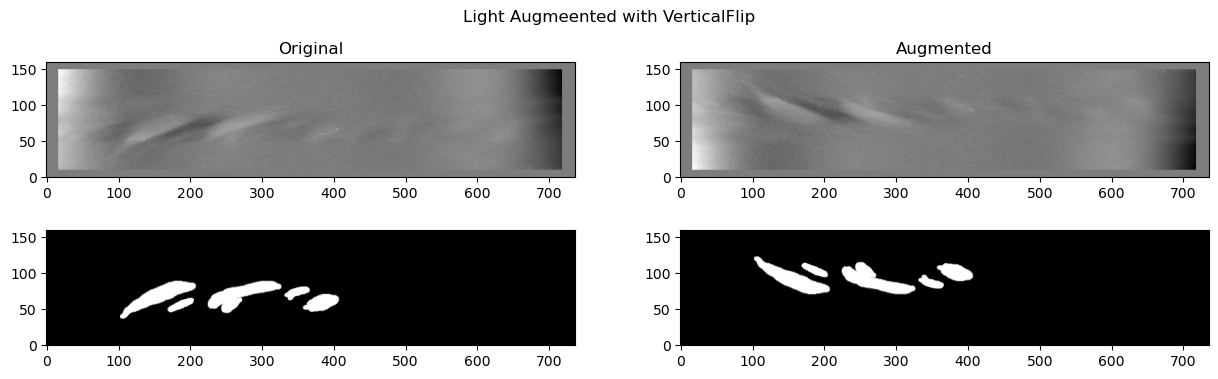

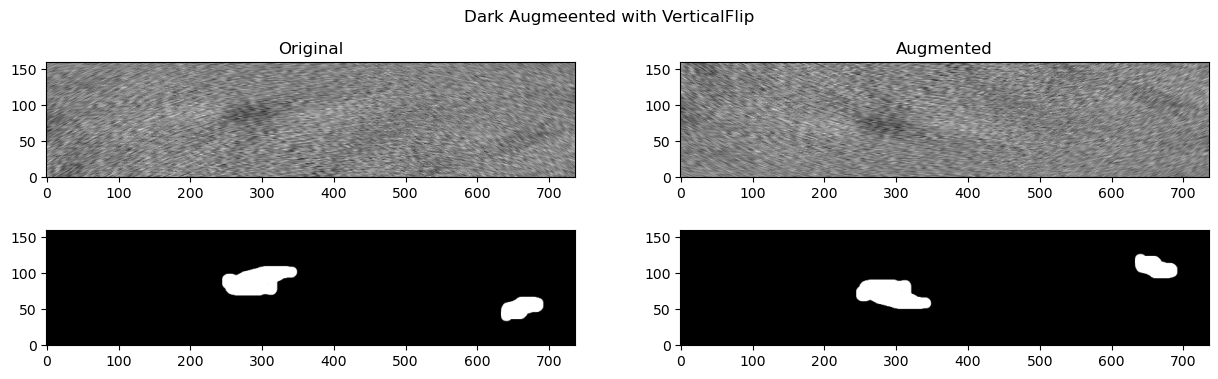

In [35]:
#Description
# Flip the input vertically around the x-axis.


aug = alb.Compose(
    [alb.VerticalFlip(p=1)],
    additional_targets={'dark_image': 'image', 'dark_mask': 'mask'}
)

augment_name = "VerticalFlip"

visualize_augmentation(aug, augment_name)

# 2 - GaussianBlur

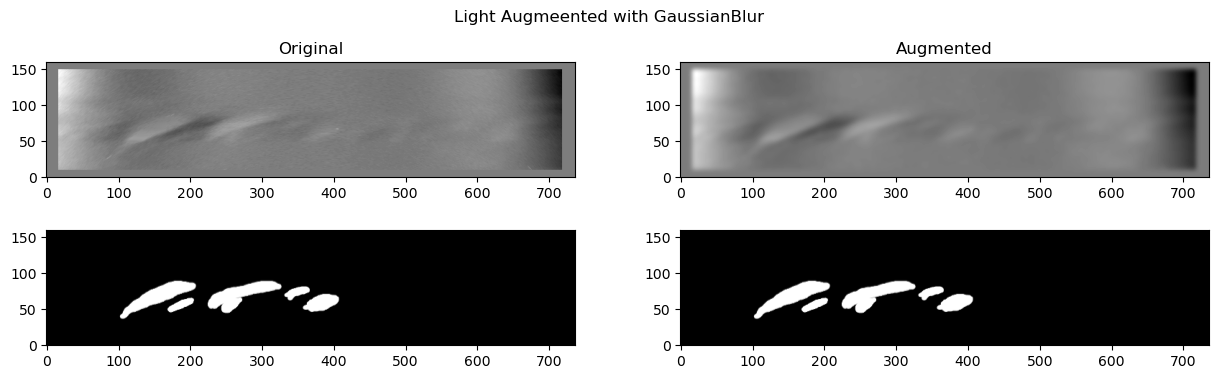

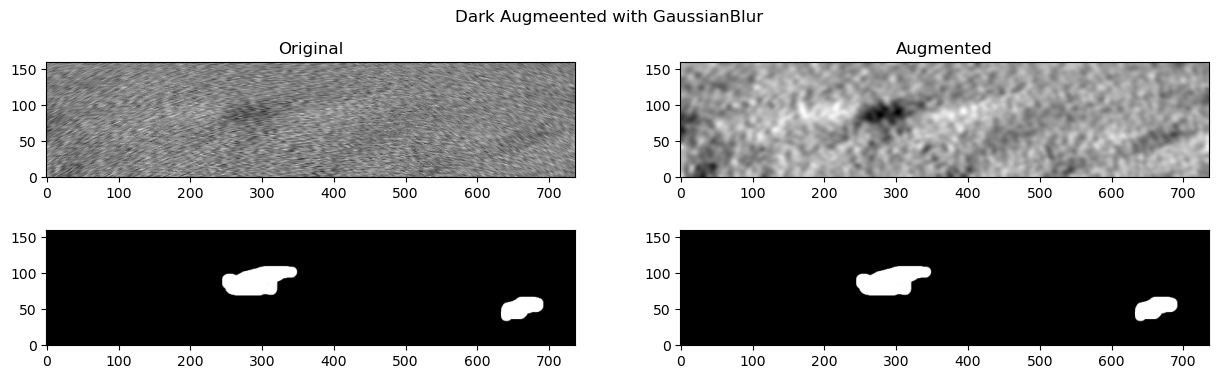

In [36]:
# Description
# Blur the input image using a Gaussian filter with a random kernel size.
# Args: 
# blur_limit: maximum Gaussian kernel size for blurring the input image.
# sigma_limit: Gaussian kernel standard deviation. Must be in range [0, inf).
#     If set to 0 sigma will be computed as sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8. Default: 0.

aug = alb.Compose(
    [alb.GaussianBlur(blur_limit=(15,17),sigma_limit = 0,  p=1)],
    additional_targets={'dark_image': 'image', 'dark_mask': 'mask'}
)

augment_name = "GaussianBlur"

visualize_augmentation(aug, augment_name)


# 3 - RandomToneCurve

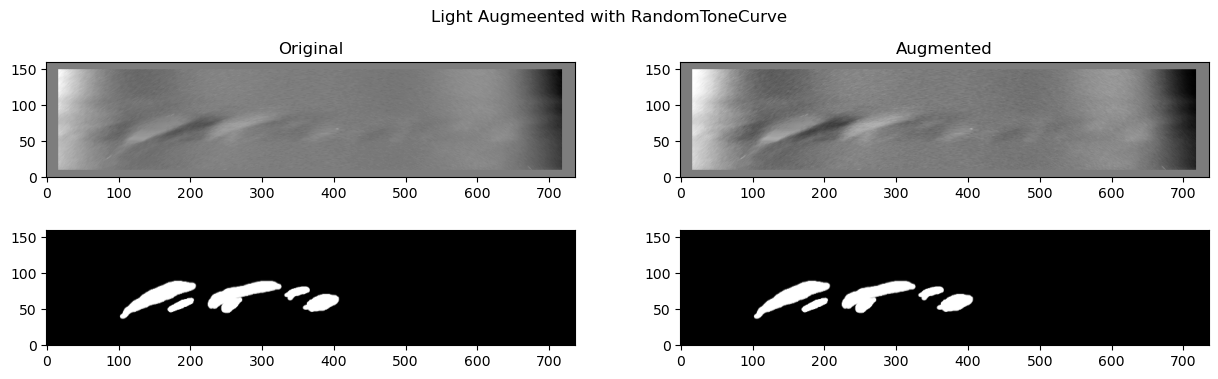

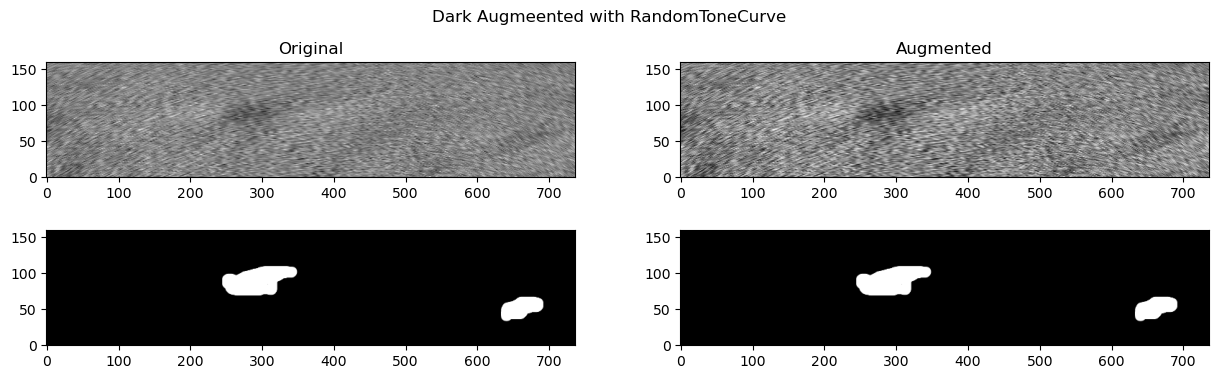

In [17]:
# Description
# Randomly change the relationship between bright and dark areas of the image by manipulating its tone curve. 
# Args: 
#     scale: standard deviation of the normal distribution.
#         Used to sample random distances to move two control points that modify the image's curve.
#         Values should be in range [0, 1]. Default: 0.1

aug = alb.Compose(
    [alb.RandomToneCurve(scale = 0.9,  p=1)],
    additional_targets={'dark_image': 'image', 'dark_mask': 'mask'}
)

augment_name = "RandomToneCurve"

visualize_augmentation(aug, augment_name)

# 4 - RandomBrightnessContrast

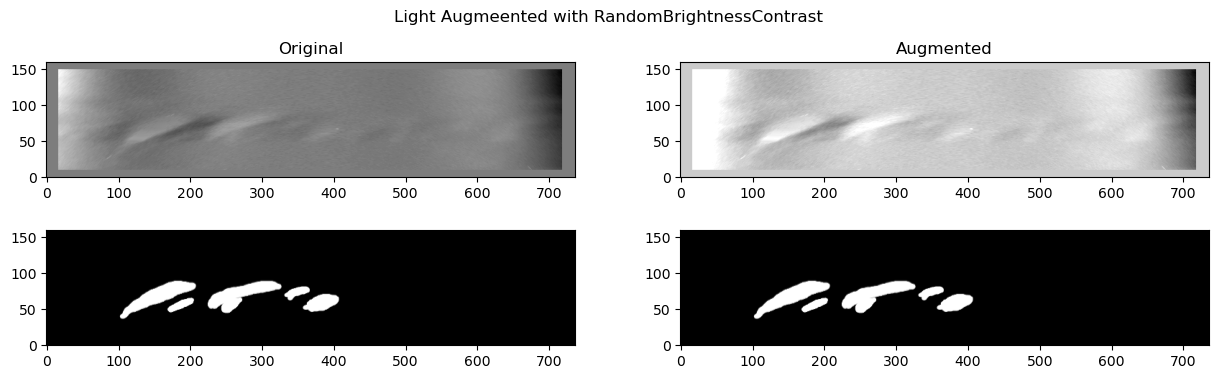

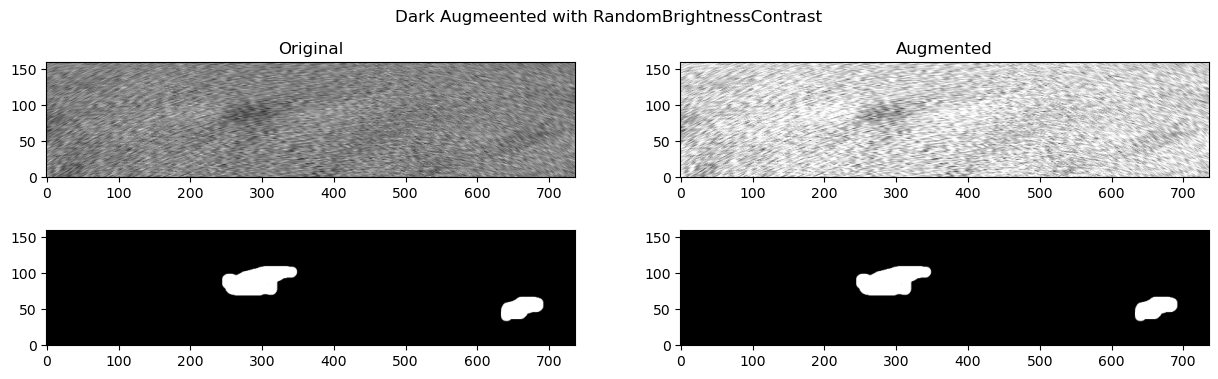

In [7]:
# Description
# Randomly change brightness and contrast of the input image.
# Args: 
#     brightness_limit ((float, float) or float): factor range for changing brightness.
#         If limit is a single float, the range will be (-limit, limit). Default: (-0.2, 0.2).
#     contrast_limit ((float, float) or float): factor range for changing contrast.
#         If limit is a single float, the range will be (-limit, limit). Default: (-0.2, 0.2).

aug = alb.Compose(
    [alb.RandomBrightnessContrast(brightness_limit=0.9, contrast_limit=0.9, p=1)],
    additional_targets={'dark_image': 'image', 'dark_mask': 'mask'}
)

augment_name = "RandomBrightnessContrast"

visualize_augmentation(aug, augment_name)

# 5 - PixelDropout

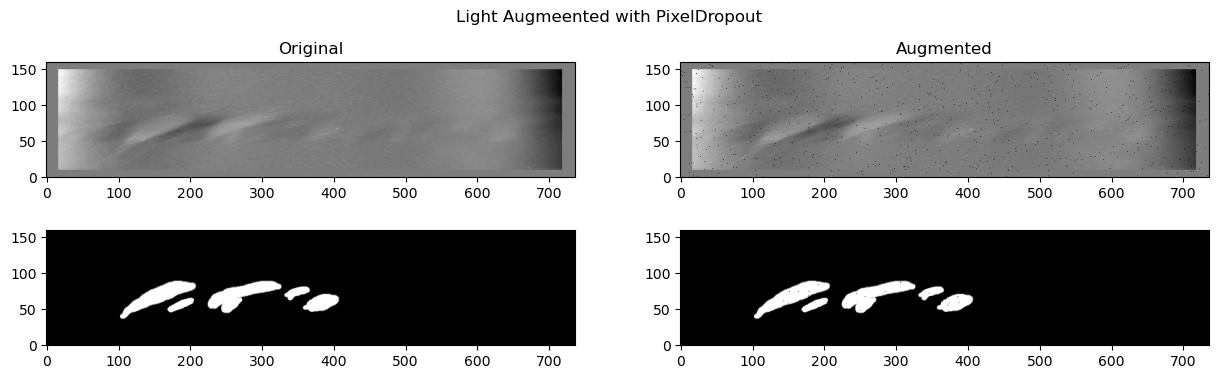

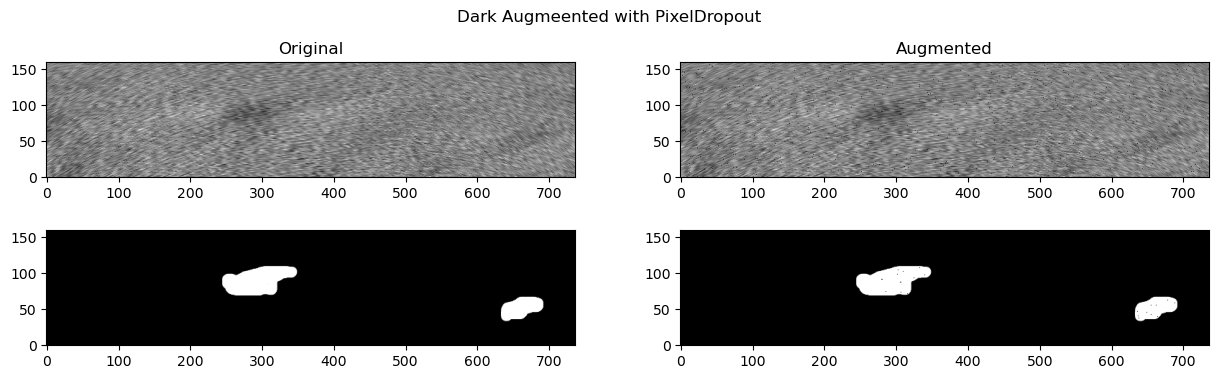

In [50]:
# Description
# Set pixels to 0 with some probability.
# Args: 
#     dropout_prob (float): pixel drop probability. Default: 0.01
#     per_channel (bool): if set to True drop mask will be sampled fo each channel,
#         otherwise the same mask will be sampled for all channels. Default: False
#     drop_value (number or sequence of numbers or None): Value that will be set in dropped place.
#         If set to None value will be sampled randomly, default ranges will be used: 
#             - uint8 - [0, 255] - uint16 - [0, 65535] - uint32 - [0, 4294967295] - float, double - [0, 1] Default: 0 
#     mask_drop_value (number or sequence of numbers or None): Value that will be set in dropped place in masks. 
#         If set to None masks will be unchanged. Default: 0 


aug = alb.Compose(
    [alb.PixelDropout(dropout_prob = 0.005, per_channel = False, drop_value = 0, mask_drop_value = 0, p=1)],
    additional_targets={'dark_image': 'image', 'dark_mask': 'mask'}
)

augment_name = "PixelDropout"

visualize_augmentation(aug, augment_name)

# 6 - CLAHE

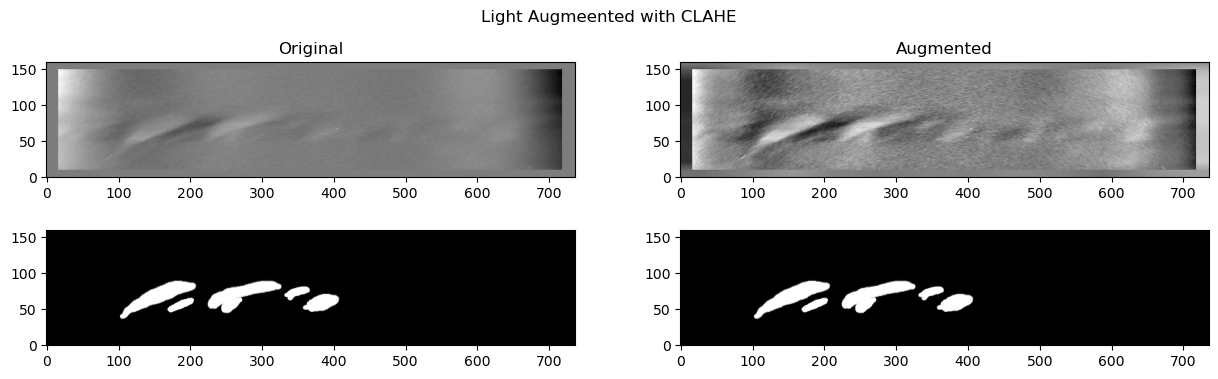

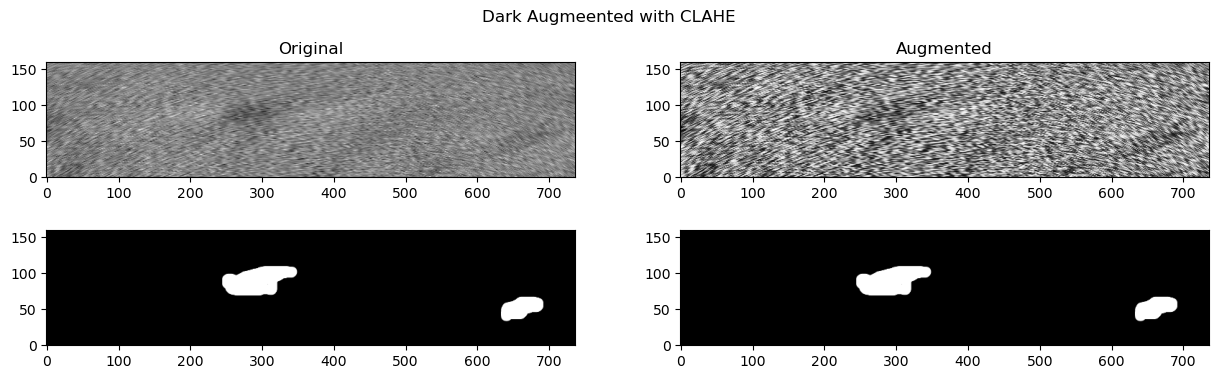

In [61]:
# Description
# Apply Contrast Limited Adaptive Histogram Equalization to the input image.
# Args: 
#       clip_limit (float or (float, float)): upper threshold value for contrast limiting.
#           If clip_limit is a single float value, the range will be (1, clip_limit). Default: (1, 4).
#       tile_grid_size ((int, int)): size of grid for histogram equalization. Default: (8, 8).

aug = alb.Compose(
    [alb.CLAHE(clip_limit = 10, tile_grid_size = (12, 12), p=1) ],
    additional_targets={'dark_image': 'image', 'dark_mask': 'mask'}
)

augment_name = "CLAHE"

visualize_augmentation(aug, augment_name)

# 7 - Sharpen

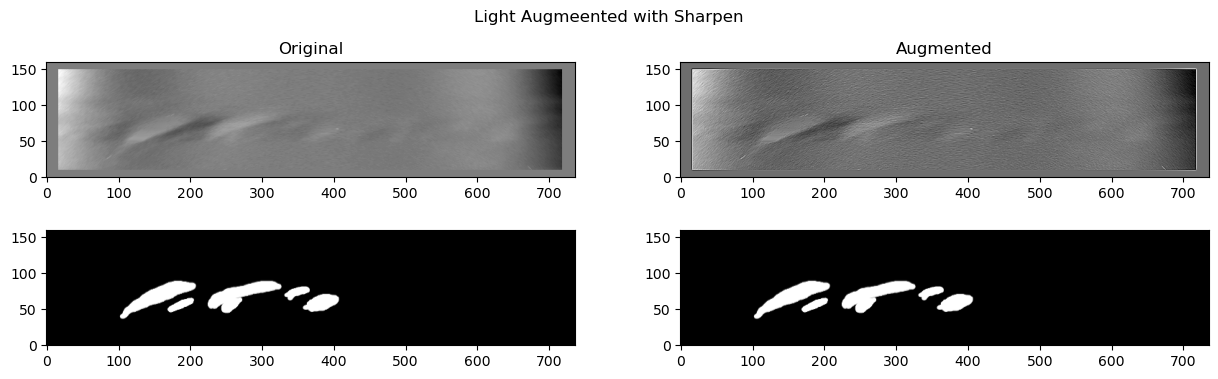

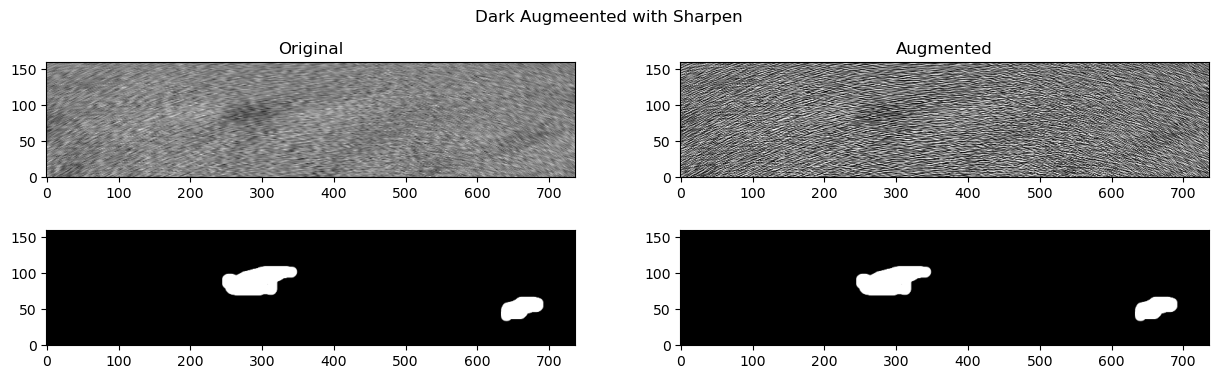

In [72]:
# Description
# Sharpen the input image and overlays the result with the original image.
# Args: 
#       alpha ((float, float)): range to choose the visibility of the sharpened image. At 0, only the original image is
#           visible, at 1.0 only its sharpened version is visible. Default: (0.2, 0.5).
#       lightness ((float, float)): range to choose the lightness of the sharpened image. Default: (0.5, 1.0).

aug = alb.Compose(
    [alb.Sharpen(alpha = (0.2, 0.5), lightness = (0.5, 1), p=1) ],
    additional_targets={'dark_image': 'image', 'dark_mask': 'mask'}
)

augment_name = "Sharpen"

visualize_augmentation(aug, augment_name)

# 8 - ShiftScaleRotate

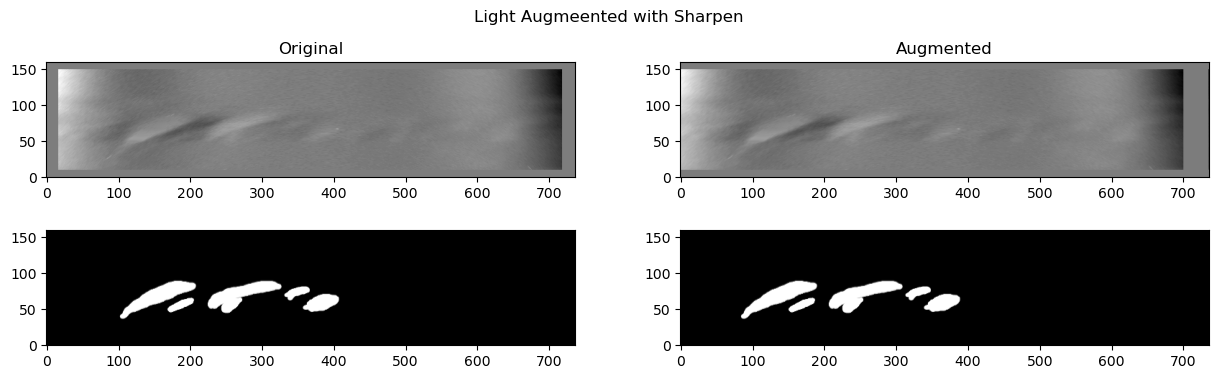

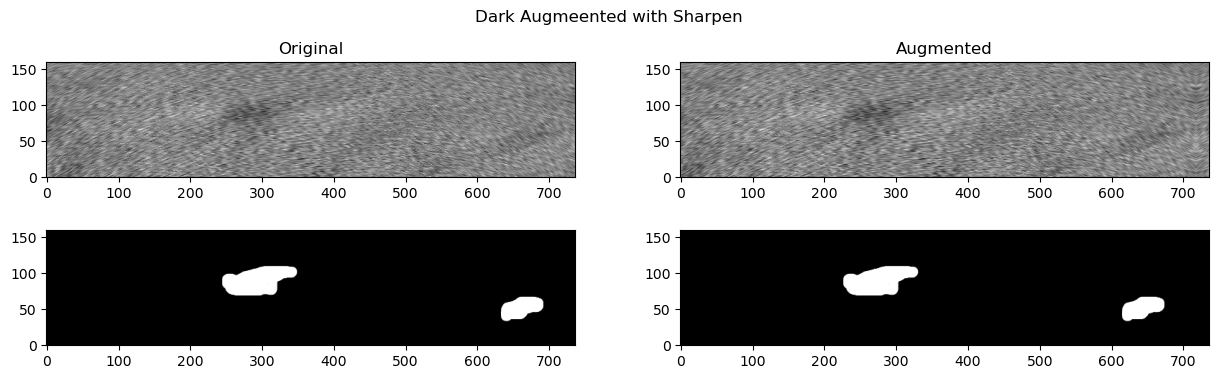

In [8]:
# Description
# SRandomly apply affine transforms: translate, scale and rotate the input.
# Args(that we are using): 
#    scale_limit ((float, float) or float): scaling factor range. 
#        If scale_limit is a single float value, the range will be (-scale_limit, scale_limit). 
#        Default: (-0.1, 0.1)
#    rotate_limit ((int, int) or int): rotation range. 
#        If rotate_limit is a single int value, the range will be (-rotate_limit, rotate_limit). 
#        Default: (-45, 45).
#    shift_limit_y ((float, float) or float): shift factor range for height. 
#        If it is set then this value instead of shift_limit will be used for shifting height. 
#        If shift_limit_y is a single float value, the range will be (-shift_limit_y, shift_limit_y). 
#        Absolute values for lower and upper bounds should lie in the range [0, 1]. 
#        Default: None.

aug = alb.Compose(
    [alb.ShiftScaleRotate(scale_limit = 0, rotate_limit = 0, shift_limit_y = 0) ],
    additional_targets={'dark_image': 'image', 'dark_mask': 'mask'}
)

augment_name = "Sharpen"

visualize_augmentation(aug, augment_name)